## Interpretability - Artificial Intelligence Frameworks 
## Final model for the 2023 AI Challenge 
#### Eva Etheve - Julie Gonzalez - Alexandre Libourel 

This notebook is dedicated to the study of the interpretability of our models. The two final models used are catboost and a neural network trained on the adversarial validation dataset on which we performed an average. We propose agnostic methods (i.e. adaptable to all models) for the final model and specific methods for the neural network (Vanilla Gradient)

In [1]:
!pip install eli5
!pip install category_encoders 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 KB 6.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.1/133.1 KB 8.8 MB/s eta 0:00:00
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107748 sha256=abfaa260d682ddc716cdf7efadc1b14c066df019789d1f519ba74ba060cf8cb1
  Stored in directory: /root/.cache/pip/wheels/85/ac/25/ffcd87ef8f9b1eec324fdf339359be71f22612459d8c75d89c
Successfully built eli5
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
notebook 5.7.16 requires jinja2<=3.0.0, but you have jinja2 3.1.2 which is incompatib

# Agnostic methods on the final model  

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import time
import sys
from sklearn.model_selection import GridSearchCV
import pickle 
import eli5
from eli5.sklearn import PermutationImportance
import seaborn as sns
from sklearn.ensemble import VotingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
# !pip install catboost
from catboost import CatBoostRegressor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 13.3 MB/s eta 0:00:00


In [4]:
#Import folders and files from google drive
from google.colab import drive
drive.mount('/content/drive') 

Mounted at /content/drive


In [5]:
cd drive/MyDrive/defiIA_tmp

/content/drive/.shortcut-targets-by-id/15w92YP0J6nA_aolKI57oRTRJ42Zq__X9/defiIA_tmp


In [6]:
CODE_UTILITIES = 'utilities'
os.chdir(f'./{CODE_UTILITIES}')

import data_loading as DL
import data_preparation_for_models as DP
import predictions_analysis as PA
from download_prediction import download_pred_Xtest

In [7]:
data,Y,var_quant,var_quali,var_quali_to_encode = DL.main_load_data2()
data.rename(columns={'Unnamed: 0': 'avatar_id'}, inplace = True)
X_train,X_vali,X_train_renorm,Y_train,X_vali_renorm,Y_vali,X_test_renorm = DP.main_prepare_train_vali_data(data,Y,var_quant,var_quali,var_quali_to_encode)

/usr/local/lib/python3.8/dist-packages/category_encoders/target_encoder.py:122: FutureWarning: Default parameter min_samples_leaf will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  warnings.warn("Default parameter min_samples_leaf will change in version 2.6."
/usr/local/lib/python3.8/dist-packages/category_encoders/target_encoder.py:127: FutureWarning: Default parameter smoothing will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  warnings.warn("Default parameter smoothing will change in version 2.6."
/content/drive/.shortcut-targets-by-id/15w92YP0J6nA_aolKI57oRTRJ42Zq__X9/defiIA_tmp/utilities/data_preparation_for_models.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#retur

In [8]:
nn = MLPRegressor(random_state=1, max_iter=1500, alpha=0.5,hidden_layer_sizes=18)

cb = CatBoostRegressor(n_estimators=2478,
                      learning_rate=0.29014147234242005,
                      max_depth=10)

models = [('nn',nn),('catboost',cb)]
ranking = [1,1]
final_average = VotingRegressor(estimators=models, weights=ranking)
tps0=time.perf_counter()
final_average.fit(X_train_renorm,Y_train)
tps1=time.perf_counter()

0:	learn: 0.4219589	total: 76.5ms	remaining: 3m 9s
1:	learn: 0.3447963	total: 101ms	remaining: 2m 5s
2:	learn: 0.2850500	total: 127ms	remaining: 1m 44s
3:	learn: 0.2352070	total: 151ms	remaining: 1m 33s
4:	learn: 0.2050133	total: 176ms	remaining: 1m 26s
5:	learn: 0.1837599	total: 200ms	remaining: 1m 22s
6:	learn: 0.1707451	total: 224ms	remaining: 1m 19s
7:	learn: 0.1626068	total: 253ms	remaining: 1m 18s
8:	learn: 0.1570915	total: 283ms	remaining: 1m 17s
9:	learn: 0.1502523	total: 307ms	remaining: 1m 15s
10:	learn: 0.1462637	total: 332ms	remaining: 1m 14s
11:	learn: 0.1432746	total: 357ms	remaining: 1m 13s
12:	learn: 0.1403970	total: 384ms	remaining: 1m 12s
13:	learn: 0.1387617	total: 410ms	remaining: 1m 12s
14:	learn: 0.1365721	total: 434ms	remaining: 1m 11s
15:	learn: 0.1351608	total: 459ms	remaining: 1m 10s
16:	learn: 0.1336862	total: 496ms	remaining: 1m 11s
17:	learn: 0.1316379	total: 529ms	remaining: 1m 12s
18:	learn: 0.1310363	total: 555ms	remaining: 1m 11s
19:	learn: 0.1296750	to

In [ ]:
print("Time of execution (sec): ", tps1-tps0)

Time of execution (sec):  87.257831724


In [ ]:
print("Score final average catboost + NN :", final_average.score(X_vali_renorm,Y_vali))

Score final average catboost + NN : 0.9618725725153916


### 1 - Feature importance 

In [10]:
feature_names = X_vali_renorm.columns
features_importance_dict = {}
name = "final_average"

In [11]:
#Takes 94.24096940800018sec = 1.57min
tps0=time.perf_counter()
permutation_import = PermutationImportance(final_average).fit(X_vali_renorm,Y_vali)
tps1=time.perf_counter()
print("Time of execution (sec) :",(tps1 - tps0))

Time of execution (sec) : 101.66180869599998


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63]),
 <a list of 64 Text major ticklabel objects>)

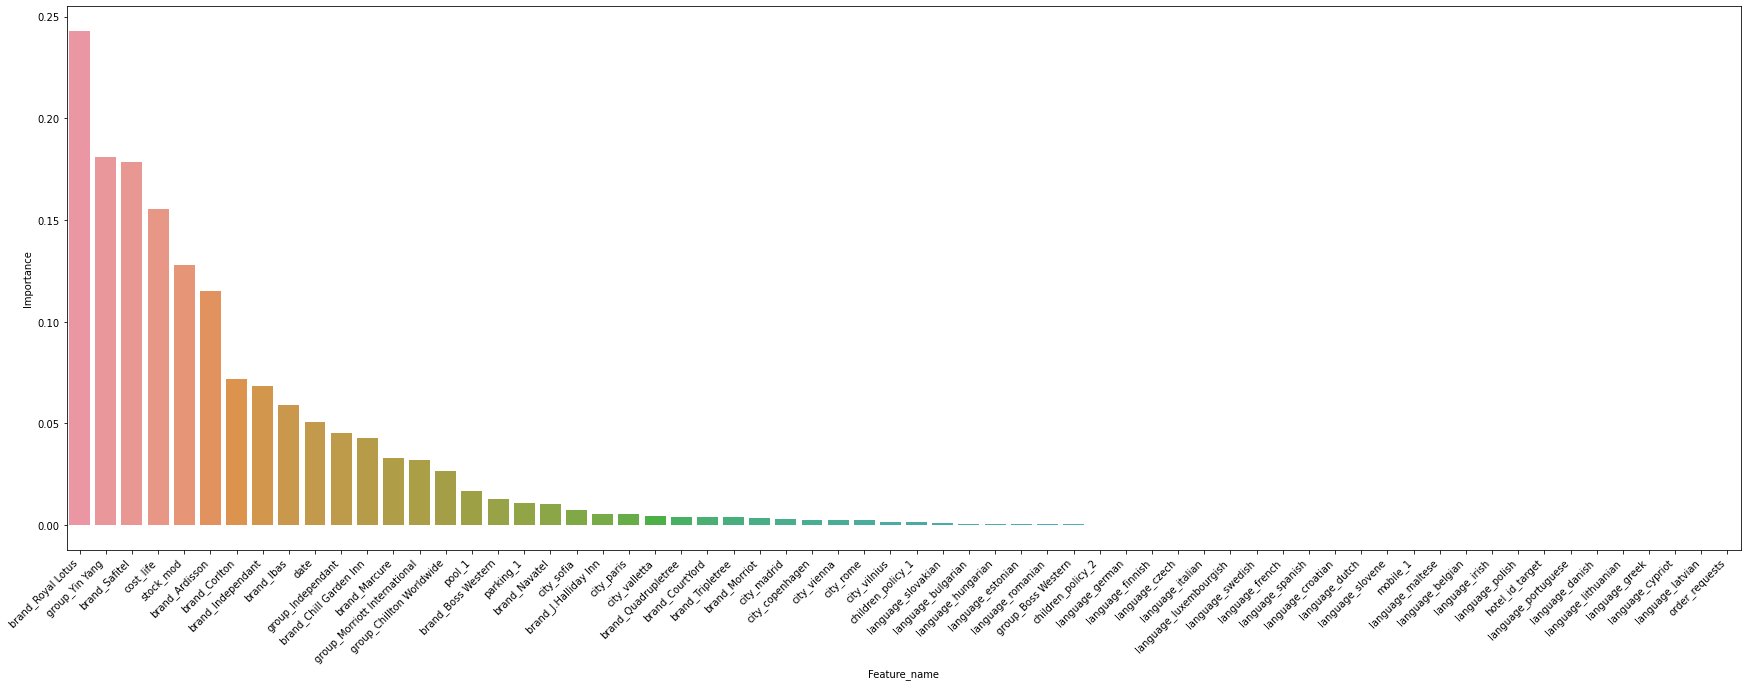

In [13]:
plt.figure(figsize=(30,10))
features_importance = {'Feature_name':feature_names, 'Importance':permutation_import.feature_importances_}  
features_importance = pd.DataFrame(features_importance) 
features_importance = features_importance.sort_values(by=['Importance'],ascending=False) 
features_importance_dict[name] = features_importance #.iloc[:5]
ax = sns.barplot(x=features_importance_dict[name]["Feature_name"], y=features_importance_dict[name]["Importance"], data=features_importance) 
plt.xticks(horizontalalignment='right', rotation=45)

The **Permutation Feature Importance** method is a method for selecting the most important variables for a given model. The principle is to create a new dataset with perturbed instances in which we will modify the value of the features by making permutations with the other instances of the dataset. We will then measure the prediction error of our model on the original dataset and compare it to the prediction error on the modified dataset. We take a feature and exchange it between different individuals. If the error increases the feature is then important. 

One drawback of this method is that it evaluates the model on instances that may have a low or zero probability to exist. Also the permutations being random, they can give different results on the same data set.

According to this previous graph, the twelve most important features : 'brand_Royal Lotus', 'group_Yin Yang', 'brand_Safitel', 'cost_life', 'stock_mod', 'brand_Ardisson', 'brand_Corlton', 'brand_Independant', 'brand_Ibas', 'date', 'group_Independant' and 'brand_Chill Garden Inn'.

We can notice that beyond the hotel brands and groups, the most important variables are in order:

- 'cost_life' ie the cost of living in the corresponding city: it makes sense to say that the higher the cost of living, the higher the price of hotel nights 

- 'stock' ie the number of remaining rooms : principle of supply and demand, the less remaining rooms the higher the prices and vice versa 

- 'date': in general, booking in advance allows you to save on the final price 

In [14]:
most_important = features_importance.iloc[:12]["Feature_name"].values.tolist()
#print(most_important)
print(len(most_important))

12


### 2 - PDP and ICE plots

We apply this method only on the most important features according to the previous section (1- Feature Importance).
The Partial Dependance Plot (PDP) is a method to know the relationship between features and prediction (linear, non-linear, stepwise). To do this, we use a Monte-Carlo estimation. We choose a feature and a range of values that will take this feature. We evaluate the prediction of our model for all the individuals of our dataset by modifying only the feature we are studying. We calculate the average of the prediction for a specific value of this feature on the whole dataset. This allows to translate the impact of a variable at different stages of values that it can take by averaging the influence of all the other features.  

In [15]:
!pip install pdpbox > /dev/null 2>&1

In [16]:
from pdpbox import pdp, get_dataset, info_plots

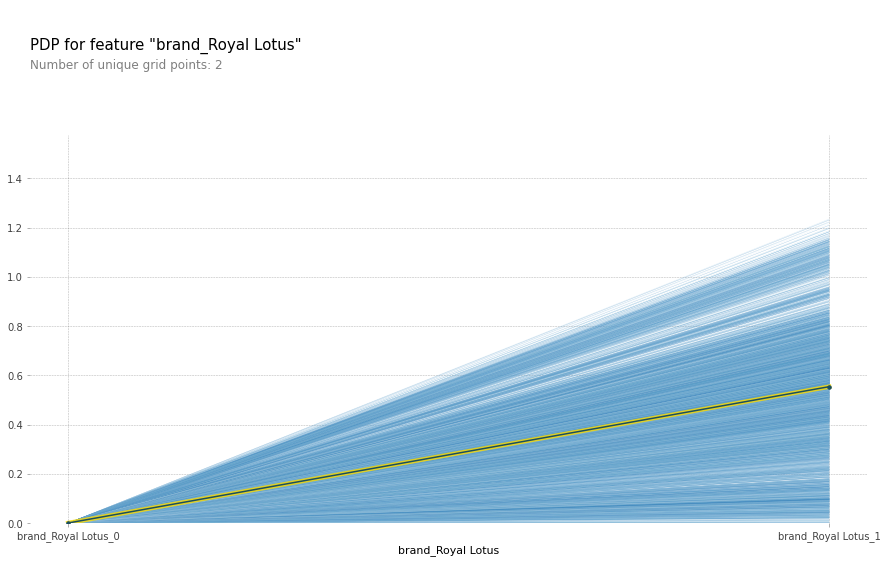

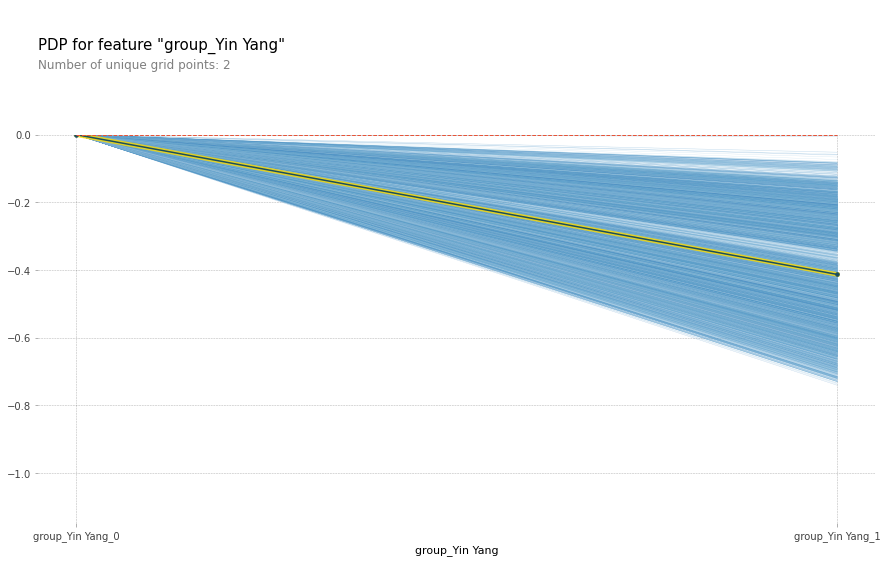

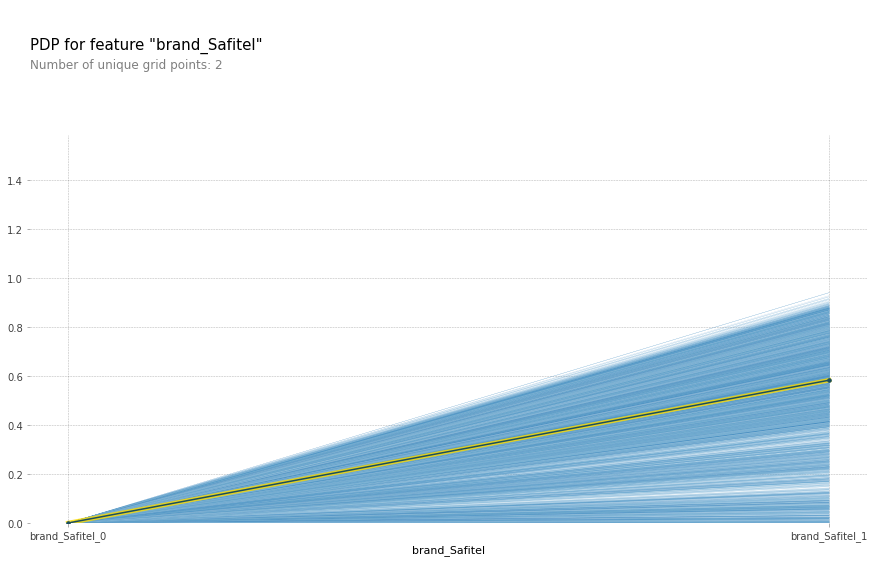

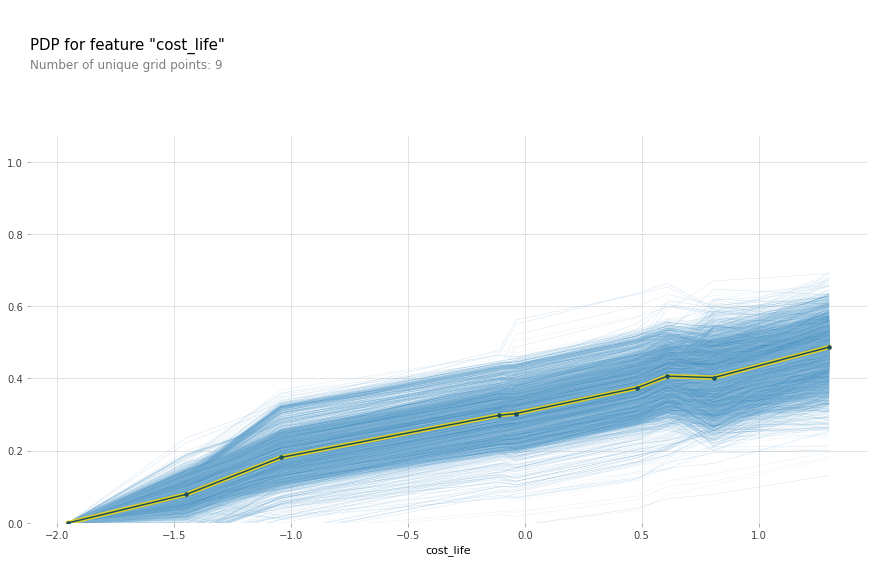

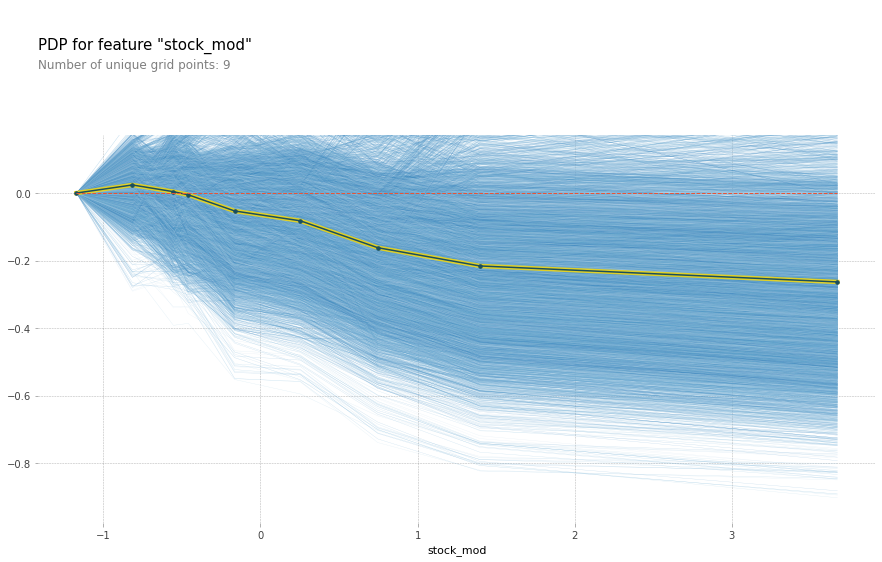

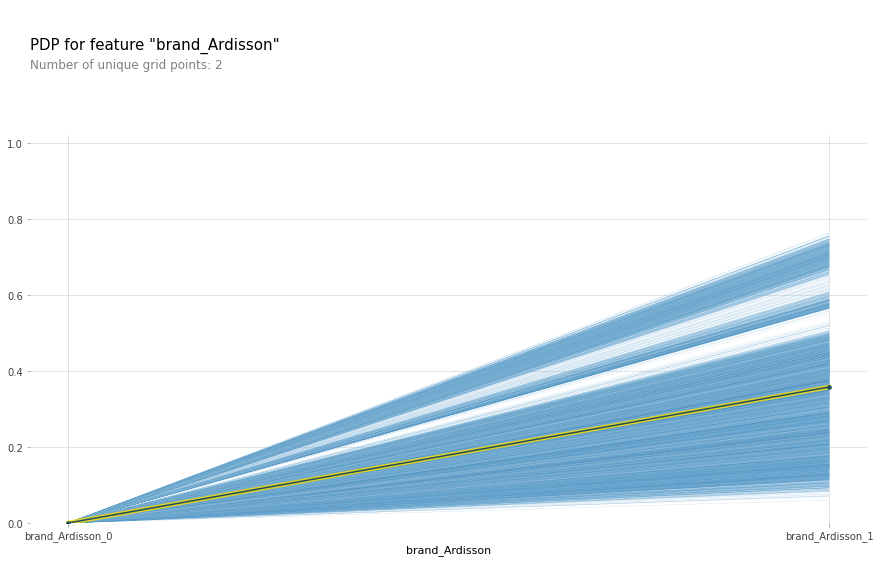

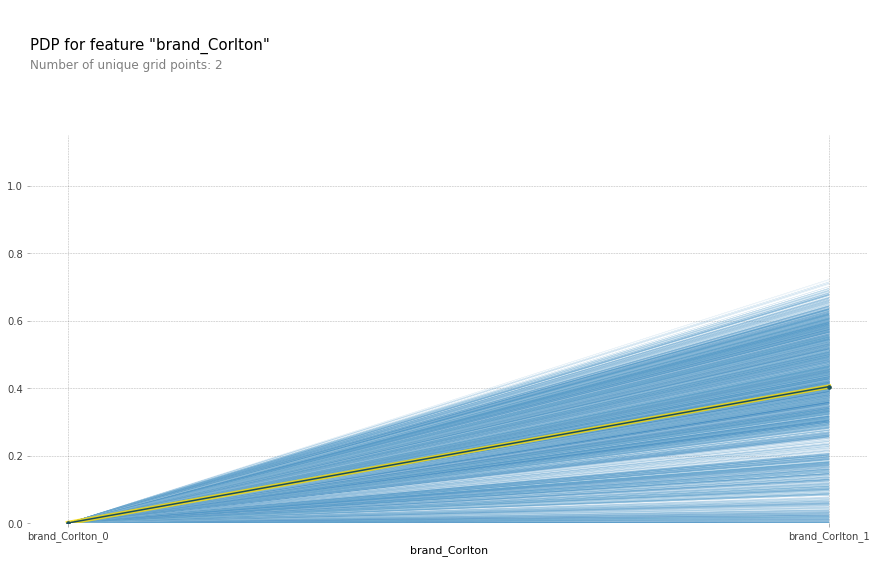

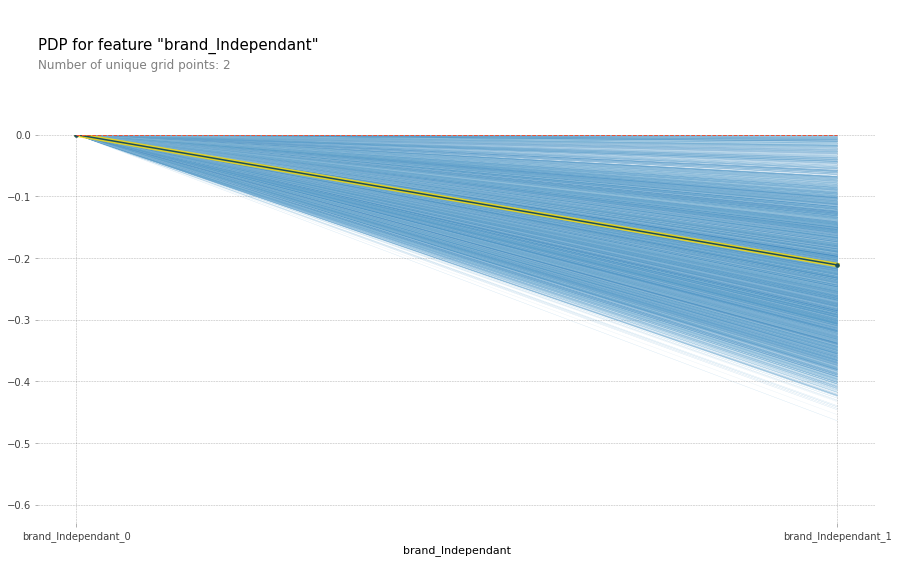

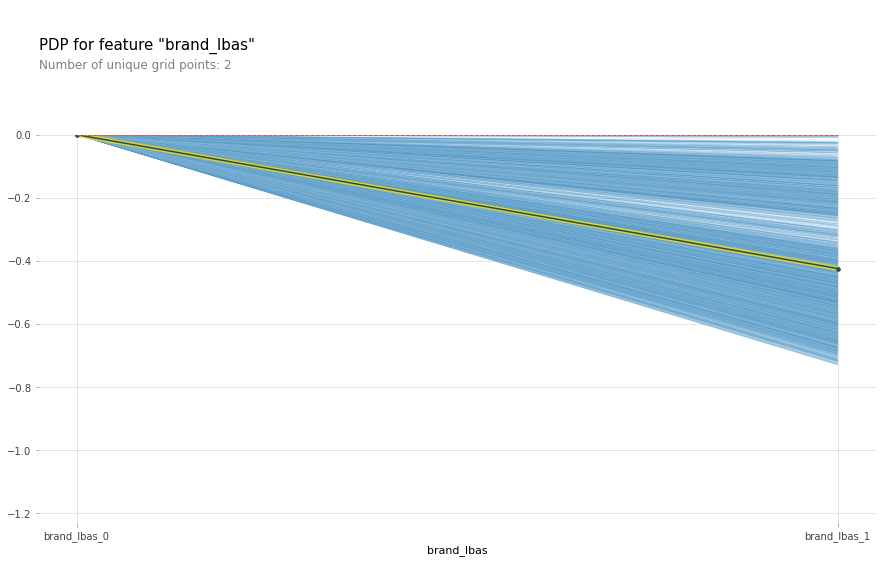

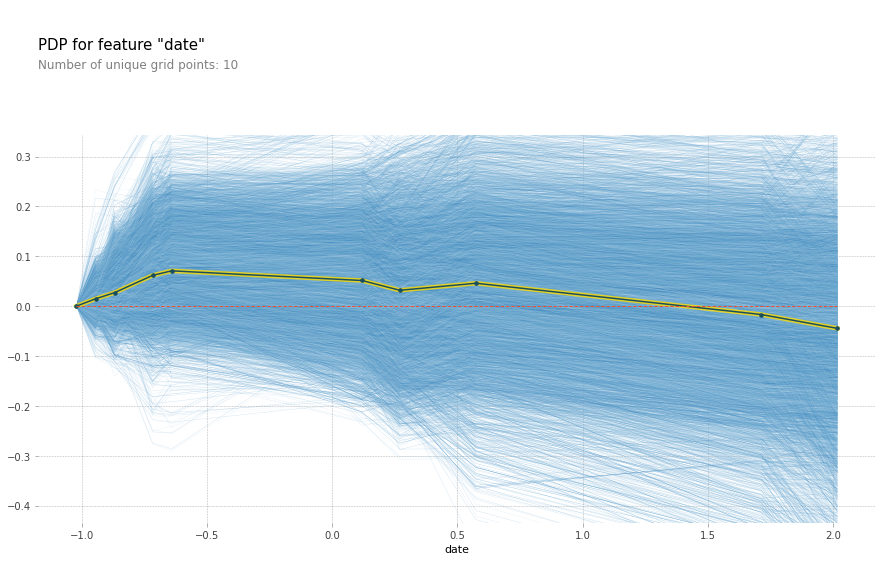

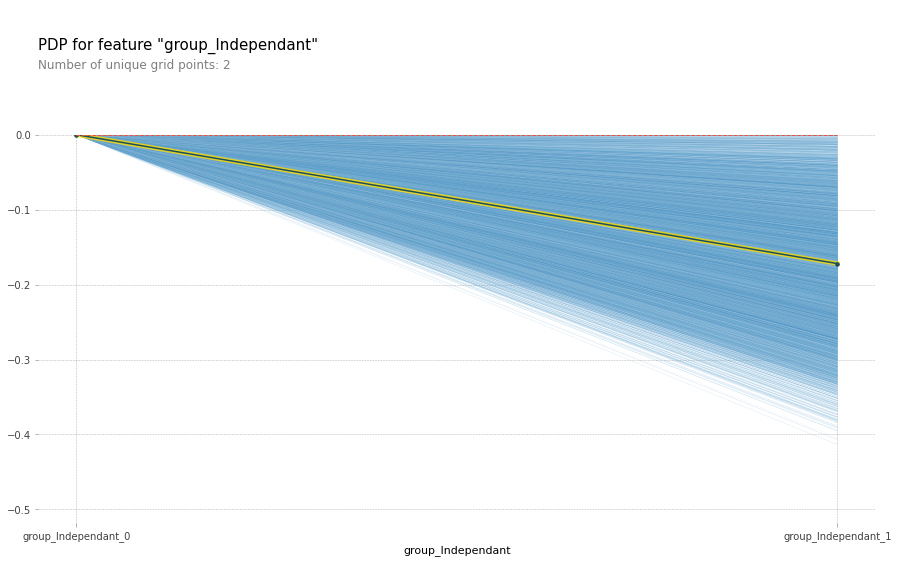

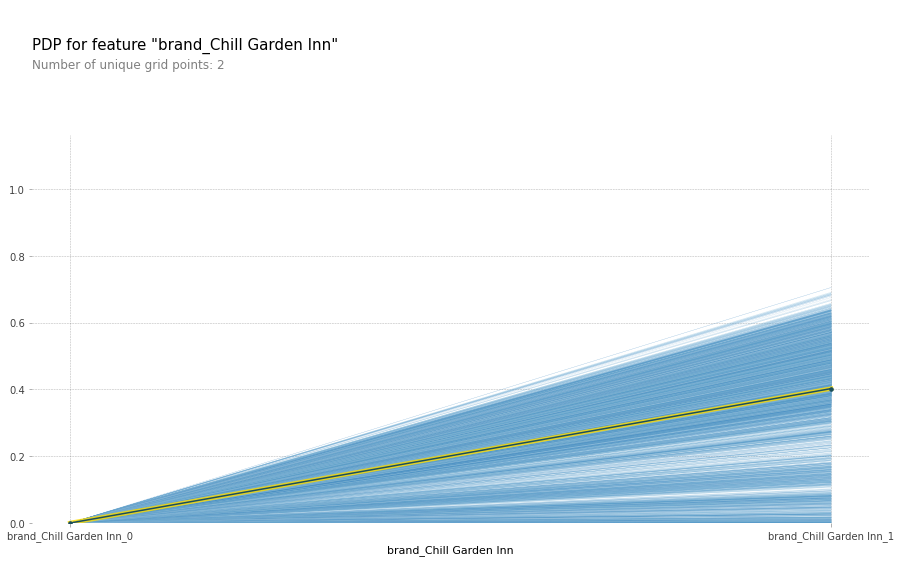

In [17]:
for feature in most_important :
  pdp_feat = pdp.pdp_isolate(model=final_average, dataset=X_vali_renorm, model_features=feature_names, feature=feature)
  pdp.pdp_plot(pdp_feat, feature, plot_lines=True, frac_to_plot=0.5)
  plt.show()

The flatter the graph, the less the feature has importance and influence on the model. 
It is also possible to visualize the combined effect of two features.

In [18]:
most_important

['brand_Royal Lotus',
 'group_Yin Yang',
 'brand_Safitel',
 'cost_life',
 'stock_mod',
 'brand_Ardisson',
 'brand_Corlton',
 'brand_Independant',
 'brand_Ibas',
 'date',
 'group_Independant',
 'brand_Chill Garden Inn']

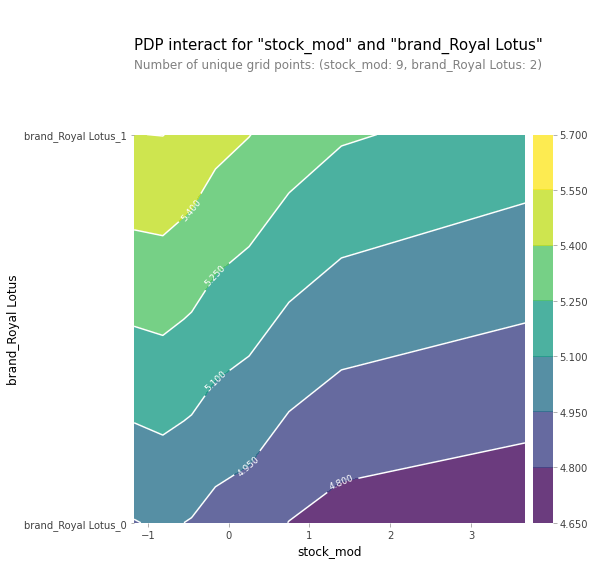

In [19]:
features_to_plot = ["stock_mod", "brand_Royal Lotus"]
inter1 = pdp.pdp_interact(model=final_average, dataset=X_vali_renorm, model_features=feature_names, features=features_to_plot)
pdp.pdp_interact_plot(pdp_interact_out=inter1, feature_names=features_to_plot, plot_type='contour')
plt.show()

### 3- SHAP (kills RAM memory)

The SHAP method is based on the shapley values, which come from the theory of collaborative multi-player games. Several players collect winnings at the end of the game and we try to find the fairest distribution of the winnings according to the participation of each player by measuring the individual contributions of each player to the winnings. To do this, we measure the importance of the different coalitions in the prediction of our model.  
A coalition corresponds to a team of players at the time the team won (a set of variables). We look at how many points the team won when one coalition was present and how many points it won when another coalition was present, etc. We thus measure the contribution of each player in the points won. 
In our model, we consider that the players are the features of the dataset and the wins are the predictions of the model.
The SHAP method is a local method that is to say that we look locally for the behavior of the model on the instances.
Here also we perturb instances. We start from an instance $X$ composed of features $X_1,...,X_M$. $X$ is not modified so it has a coalition where all features are present. From $X$ onwards we perturb the coalitions : we modify only some groups of features.
Then we use a SHAP kernel to measure the distance between the perturbed instances and the original instance. The SHAP kernel gives more importance to coalitions with very few or many features.


In [ ]:
#!pip install shap > /dev/null 2>&1

In [ ]:
"""import shap
shap.initjs() 

idx = 1

#Very long 
tps0=time.perf_counter()
X_train_summary = shap.kmeans(X_train_renorm,10)
explainer = shap.KernelExplainer(final_average.predict, X_train_renorm)
shap_values = explainer.shap_values(X_vali_renorm).iloc[0:20,:]
shap.summary_plot(shap_values, X_vali_renorm).iloc[0:20,:] #single exemple plot
tps1=time.perf_counter()
print("Temps execution en sec :",(tps1 - tps0))
plt.figure()
#Summary on the dataset. To speed up we just compute the shap values for 20 exemples"""

  0%|          | 0/23636 [00:00<?, ?it/s]

### 4- LIME 

Local method that uses substitution models. The goal is to find a white box substitution model to estimate a black box model locally.  Thus, we focus on the explanation of prediction on specific instances. One then produces perturbations of this instance and then computes the predictions of the black box model on these perturbed instances. 
We train a surrogate model on the dataset containing both our perturbed instances and the corresponding black box model predictions. We then use a loss function that we weight according to the distance between
the perturbed instances and the original instance. This allows us to approximate the way the model makes decisions in a local way (example: a linear boundary).
Again the drawback here is that since the perturbations are also random, if one reruns several LIMEs, one will get different explanations. 

- https://algotech.netlify.app/blog/interpreting-black-box-regression-model-with-lime/
- https://marcotcr.github.io/lime/tutorials/Using%2Blime%2Bfor%2Bregression.html

In [20]:
!pip install lime > /dev/null 2>&1

In [23]:
import lime
import lime.lime_tabular

index = 0

explainer = lime.lime_tabular.LimeTabularExplainer(X_vali_renorm.values, feature_names=feature_names, mode="regression")
exp = explainer.explain_instance(X_vali_renorm.iloc[index], final_average.predict, num_features=20, top_labels=1)
exp.show_in_notebook(show_table=True, show_all=True)
exp.save_to_file('lime.html')

In [ ]:
np.exp(4.72)

112.16825266780917

In [ ]:
most_important

['brand_Royal Lotus',
 'group_Yin Yang',
 'brand_Safitel',
 'cost_life',
 'stock_mod',
 'brand_Ardisson',
 'brand_Corlton',
 'brand_Independant',
 'brand_Ibas',
 'date',
 'group_Independant',
 'brand_Chill Garden Inn']

**Interpretation**: Here we have selected an individual for which the prediction of the model is 4.72 (the corresponding price is given by $e^{4.72} = 112€ $ approximately). We then perturbed this instance to build a model, here of regression, to explain our black box model. The middle graph represents the 5 features having the most influence on the prediction of the model. These coefficients give the importance of these variables in the local prediction around this individual. We notice that these variables are almost the same as for the first method (1- Feature Importance) where the first 5 features were 'brand_Royal Lotus', 'group_Yin Yang', 'brand_Safitel', 'cost_life' and 'stock_mod'. Here we also have 'brand_Safitel', 'brand_Royal Lotus', 'group_Yin Yang' as common features to which are added 'brand_Corlton' and 'brand_Ardisson'. All these variables have a (negative) impact except for 'group_Yin Yang' that has a positive impact. The last graph just gives the value of all features for this prediction. 

# Agnostic methods for the Neural Network

In [ ]:
def Model_NN(X_train,Y_train,param_opt):
    '''
    Final model which takes as an imput the optimal parameters computed during
    the optimization

    Parameters
    ----------
    X_train : pandas.dataframe
        training dataset input.
    Y_train : pandas.dataframe
        training dataset output.
    param_opt : dic
        dictionary of optiaml parameters for learning_rate and max_depth.

    Returns
    -------
    nnetOpt : optimal model fit on the training data

    '''
    alpha = param_opt['alpha']
    hidden_layer_sizes = param_opt["hidden_layer_sizes"]
    tps0=time.perf_counter()
    nnetOpt = MLPRegressor(random_state=1, max_iter=1500, alpha=alpha,hidden_layer_sizes=hidden_layer_sizes)
    history = nnetOpt.fit(X_train, Y_train)
    tps1=time.perf_counter()
    print("Temps execution pour l'entrainement en sec :",(tps1 - tps0))
    
    # plot loss
    plt.figure()
    plt.plot(history.loss_curve_, label="loss")
    plt.legend()
    plt.title("Loss Curve", fontsize=14)
    plt.xlabel('Iterations')
    plt.ylabel('Cost')
    plt.show()
    
    return nnetOpt

Temps execution pour l'entrainement en sec : 14.045136216000174


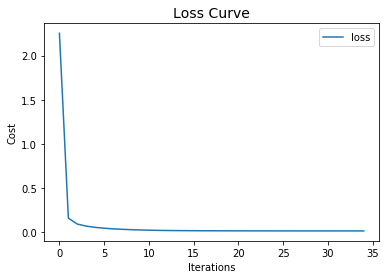

In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import accuracy_score

params = {
    "alpha": 0.5,
    "hidden_layer_sizes": (18,),
}
nn = Model_NN(X_train_renorm, Y_train, params)

In [ ]:
"""cd ..
pickle.dump(nn, open("weigths/neural_network_adversarial.sav", 'wb'))""""""

In [ ]:
tps0=time.perf_counter()
permutation_import = PermutationImportance(nn).fit(X_vali_renorm,Y_vali)
tps1=time.perf_counter()
print("Time of execution (sec) :",(tps1 - tps0))

Time of execution (sec) : 3.3390473990002647


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63]),
 <a list of 64 Text xticklabel objects>)

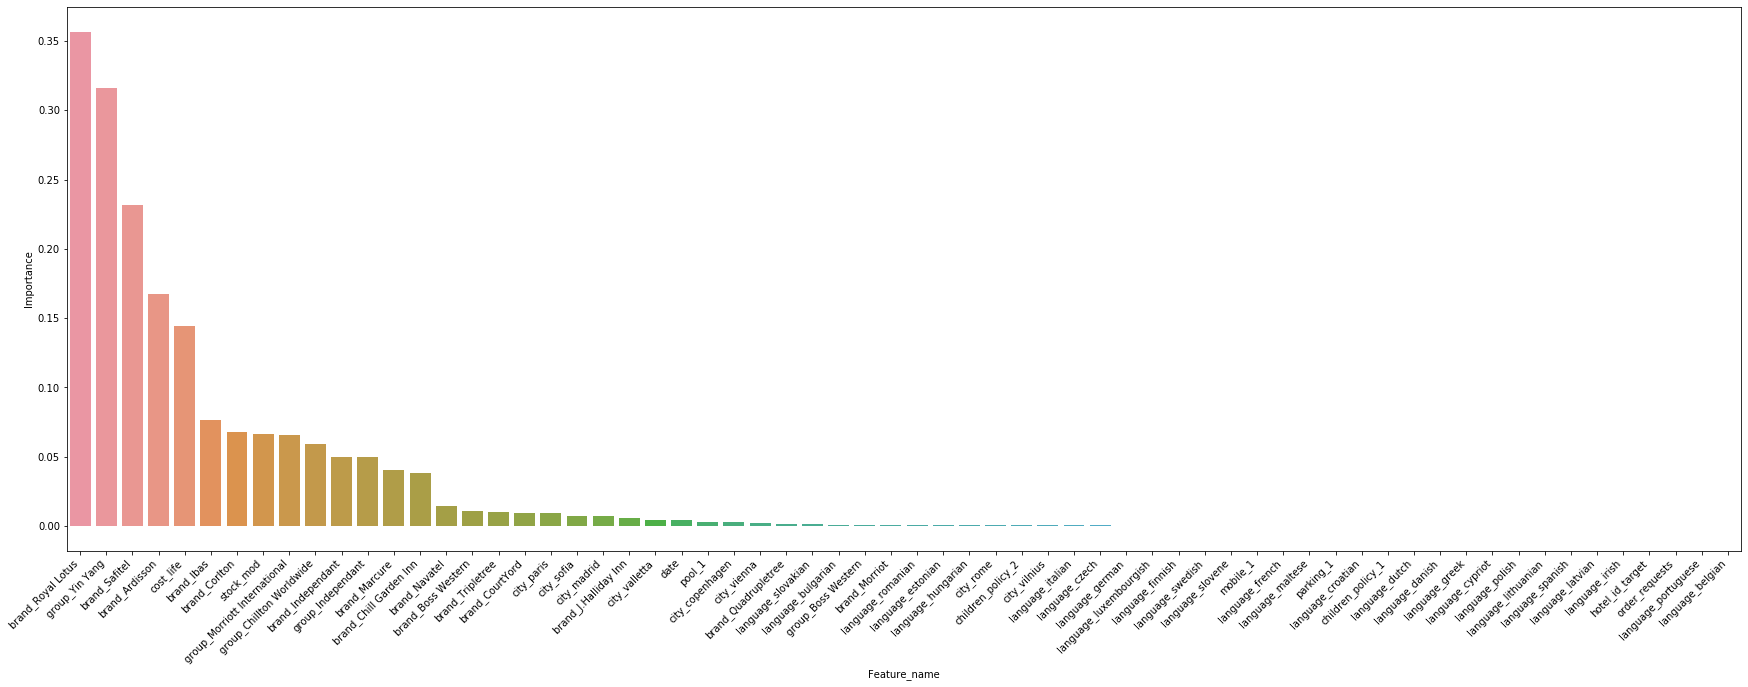

In [ ]:
feature_names = X_vali_renorm.columns
features_importance_dict = {}
name = "neural network adversarial"

plt.figure(figsize=(30,10))
features_importance = {'Feature_name':feature_names, 'Importance':permutation_import.feature_importances_}  
features_importance = pd.DataFrame(features_importance) 
features_importance = features_importance.sort_values(by=['Importance'],ascending=False) 
features_importance_dict[name] = features_importance #.iloc[:5]
ax = sns.barplot(x=features_importance_dict[name]["Feature_name"], y=features_importance_dict[name]["Importance"], data=features_importance) 
plt.xticks(horizontalalignment='right', rotation=45) 

Here the 3 most important features are the same as for the first part, the rest being almost similar. Moreover, we notice that in the case of NN, the coefficients are higher but decrease faster than for our final model. 

In [ ]:
most_important = features_importance.iloc[:10]["Feature_name"].values.tolist()
print(len(most_important))

10


### 2 - PDP and ICE plots

In [ ]:
!pip install pdpbox > /dev/null 2>&1

In [ ]:
from pdpbox import pdp, get_dataset, info_plots

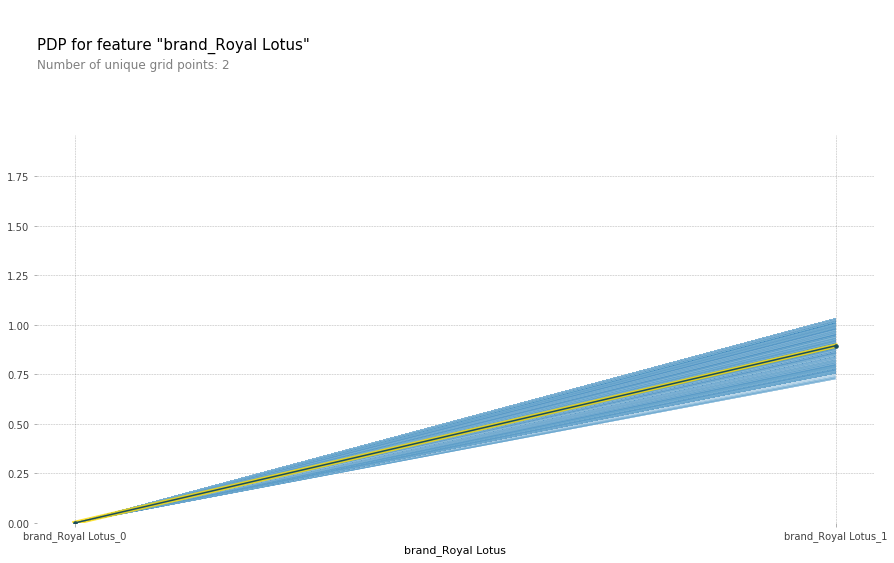

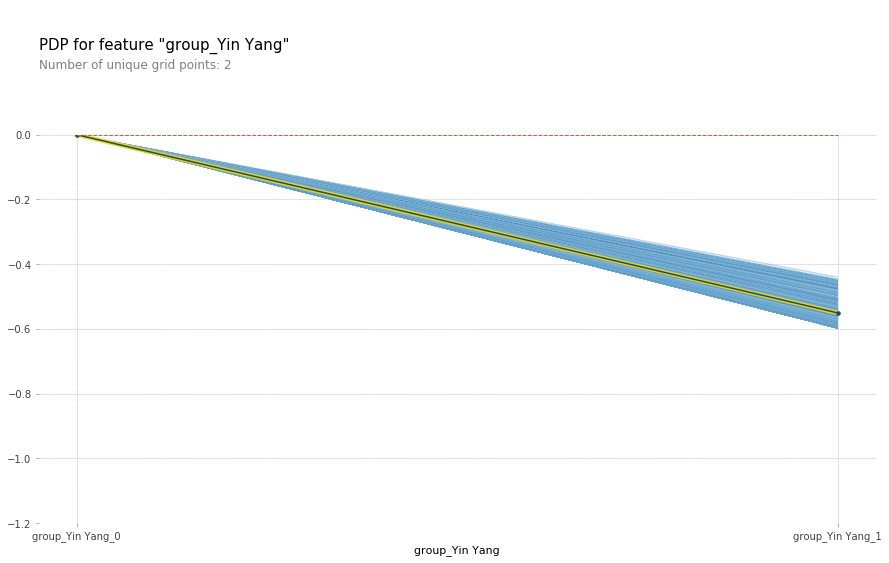

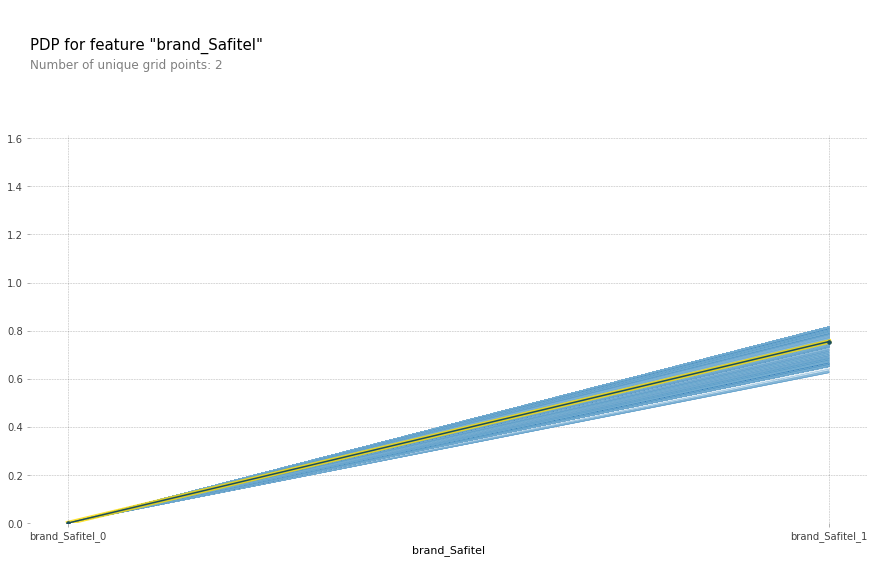

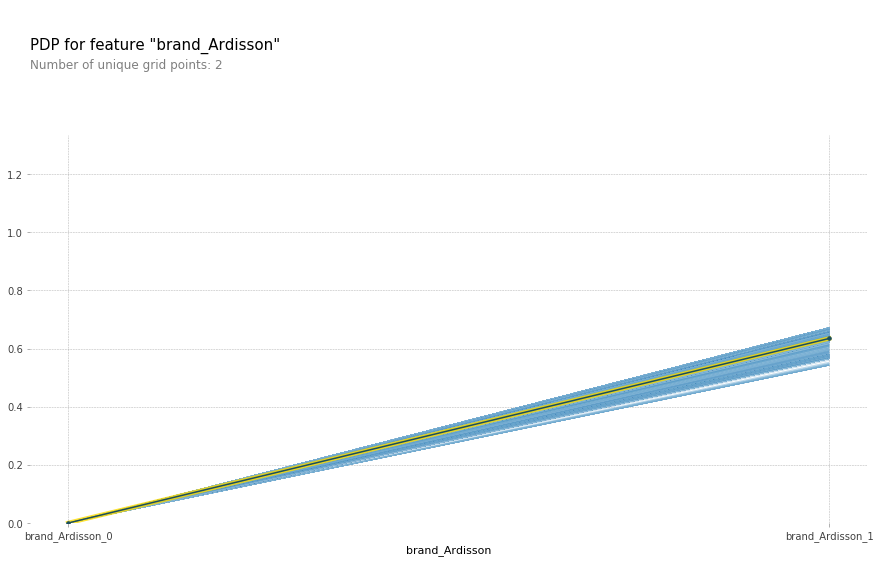

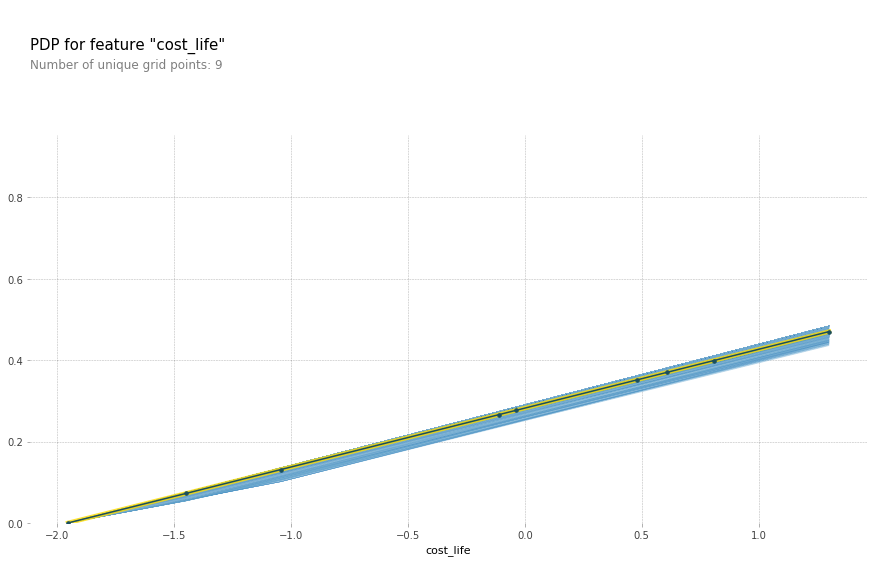

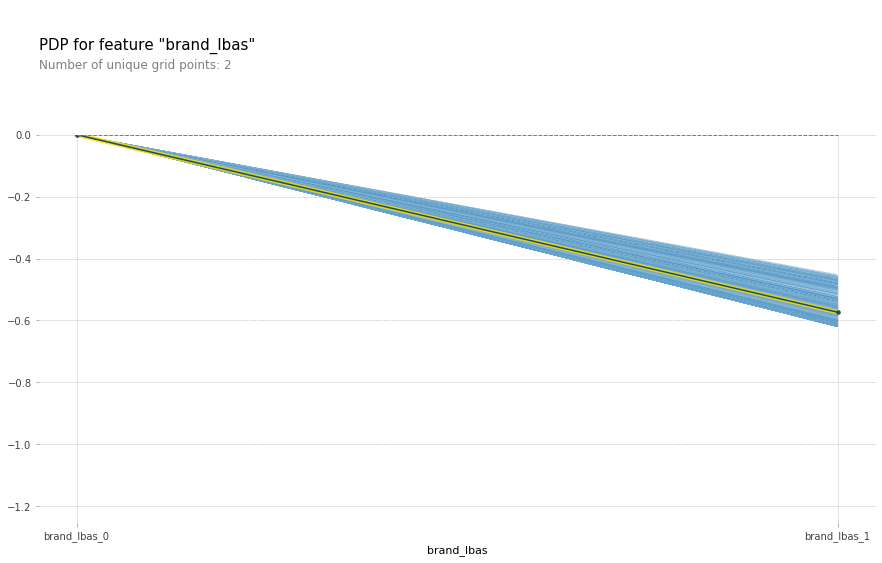

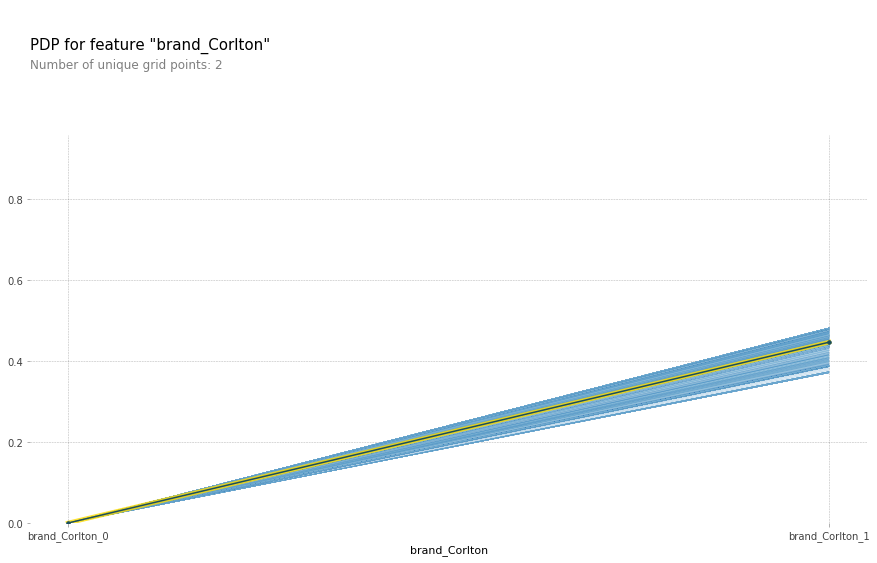

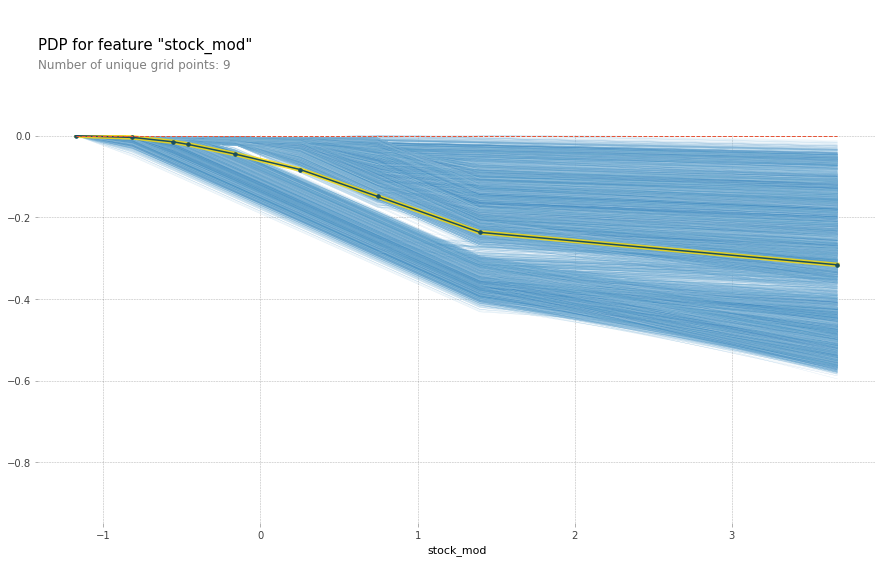

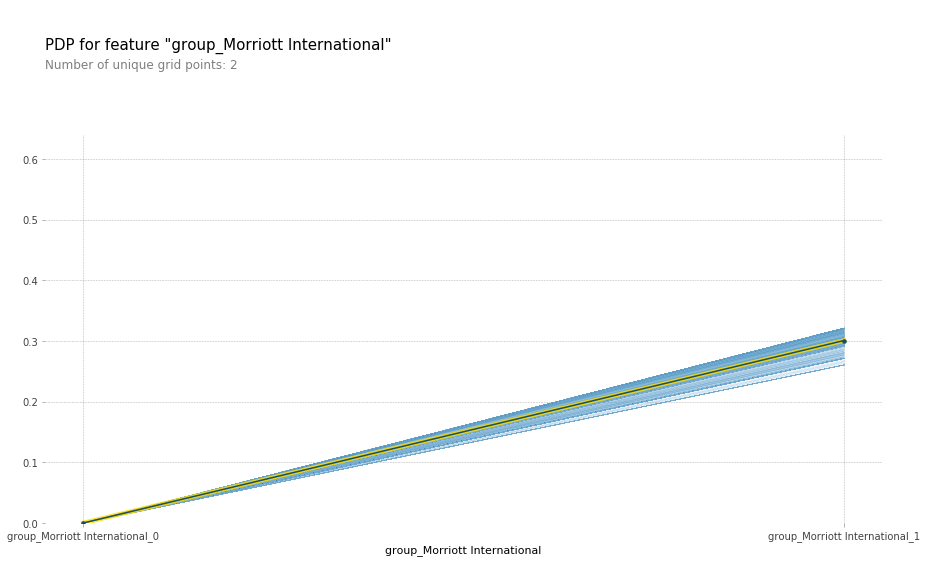

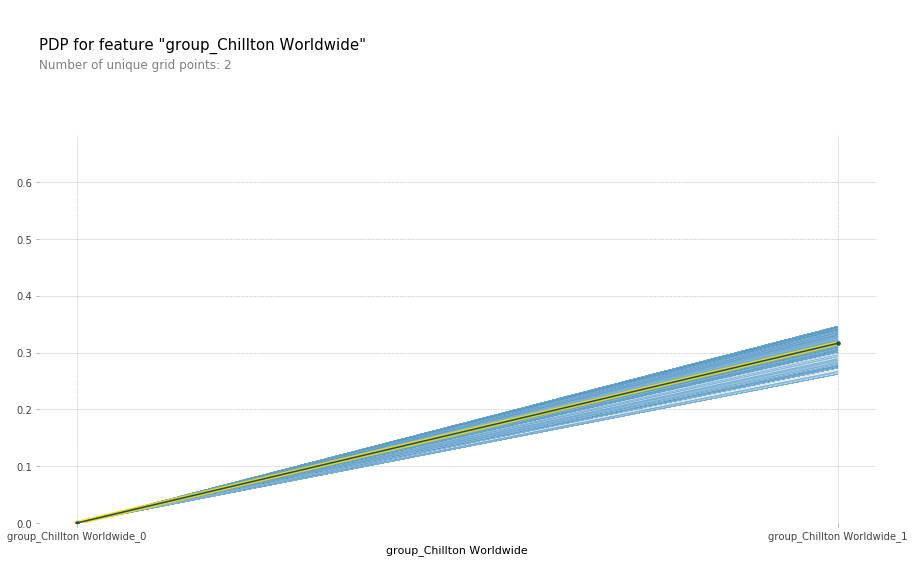

In [ ]:
for feature in most_important :
  pdp_feat = pdp.pdp_isolate(model=nn, dataset=X_vali_renorm, model_features=feature_names, feature=feature)
  pdp.pdp_plot(pdp_feat, feature, plot_lines=True, frac_to_plot=0.5)
  plt.show()

Compared to the first part, we can see that here the studs are less flattened.

### 3- LIME 

In [ ]:
import lime
import lime.lime_tabular

index = 0

explainer = lime.lime_tabular.LimeTabularExplainer(X_vali_renorm.values, feature_names=feature_names, mode="regression")
exp = explainer.explain_instance(X_vali_renorm.iloc[index], nn.predict, num_features=5, top_labels=1)
exp.show_in_notebook(show_table=True, show_all=True)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Here too the features are almost the same 'brand_Royal Lotus', 'brand_Safitel', 'brand_Ardisson', 'group_Yin Yang' and 'stock_mod'.

In [ ]:
#nnetOpt = pickle.load(open('../weigths/neural_network_adversarial.sav', 'rb'))